# Cell 1 - Import

In [2]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

print("✓ Imports OK")


✓ Imports OK


# Cell 2 - Importing DT from NB_02

In [3]:
data_path = "../data/processed/spotify_dataset_clean.csv"

df = pd.read_csv(data_path)
print("Dataset loaded:", df.shape)
df.head()


Dataset loaded: (169909, 15)


,track_id,track_name,artist_name,popularity,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],0,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,158648
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",0,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,282133
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],0,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,104300
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],0,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,180760
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",1,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,687733


## Cell 4 - Selecting Audio-features only


In [4]:
audio_features = [
    "acousticness", "danceability", "energy", "instrumentalness",
    "liveness", "loudness", "speechiness", "tempo", "valence", "duration_ms"
]

df_audio = df[audio_features].copy()
df_audio.shape


(169909, 10)

# Cell 5 - Normilization

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_audio)

print("Shape X_scaled:", X_scaled.shape)

Shape X_scaled: (169909, 10)


# Cell 6 - PCA

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["pca_x"] = X_pca[:, 0]
df["pca_y"] = X_pca[:, 1]

print("Explained variance:", pca.explained_variance_ratio_)
df.head()


Explained variance: [0.30957334 0.14704823]


,track_id,track_name,artist_name,popularity,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,pca_x,pca_y
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],0,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,158648,-1.010631,1.593194
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",0,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,282133,-4.751081,-0.113671
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],0,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,104300,-0.184709,4.573615
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],0,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,180760,-1.671672,1.857104
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",1,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,687733,-4.018761,-2.630070


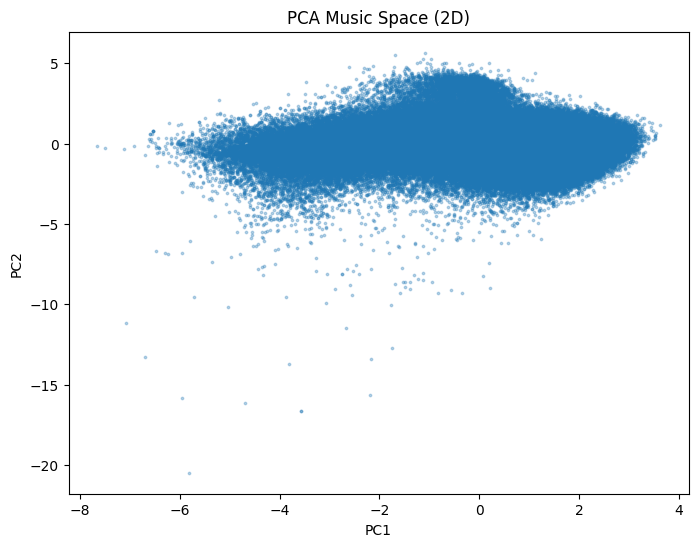

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(df["pca_x"], df["pca_y"], s=3, alpha=0.3)
plt.title("PCA Music Space (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Cell 7 - Clustering K-means

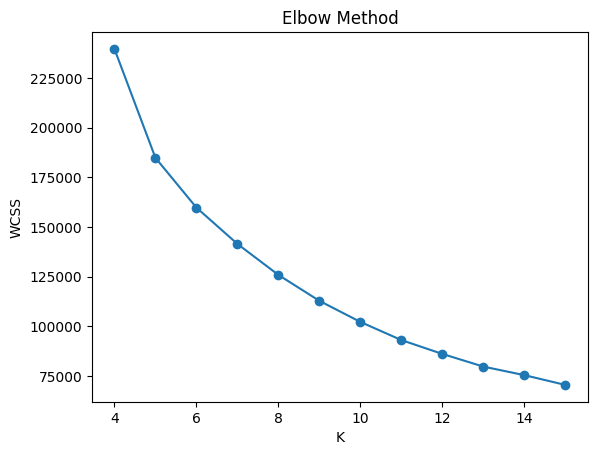

In [8]:
wcss = []
K_range = range(4, 16)

for k in K_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    kmeans_test.fit(X_pca)
    wcss.append(kmeans_test.inertia_)

plt.plot(K_range, wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()


In [9]:
K = 8
kmeans = KMeans(n_clusters=K, random_state=42)
clusters = kmeans.fit_predict(X_pca)

df["cluster"] = clusters
print(df["cluster"].value_counts())


cluster
4    30856
6    30008
1    26795
5    20248
3    19966
2    16255
0    13580
7    12201
Name: count, dtype: int64


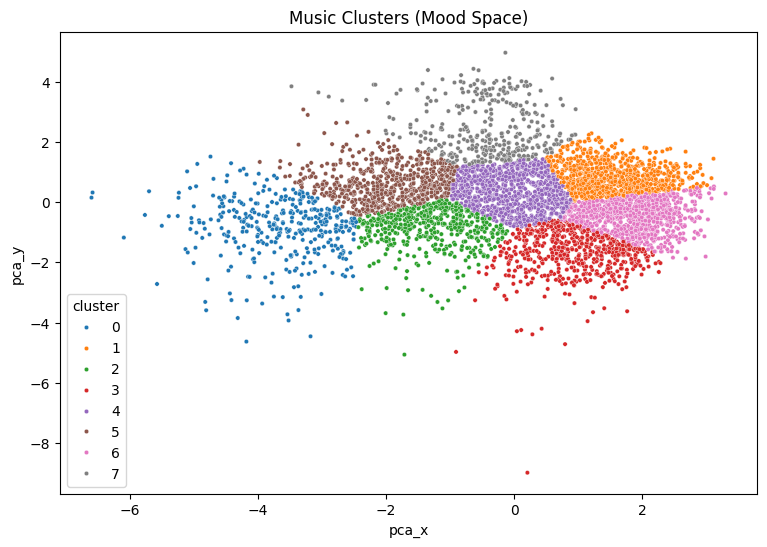

In [10]:
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=df.sample(5000, random_state=42),
    x="pca_x", y="pca_y", hue="cluster", palette="tab10", s=10
)
plt.title("Music Clusters (Mood Space)")
plt.show()


In [11]:
cluster_summary = df.groupby("cluster")[audio_features].mean()
cluster_summary


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms
cluster,,,,,,,,,,
0,0.926713,0.276038,0.122770,0.669112,0.168209,-21.433526,0.043681,95.651905,0.145525,308491.465538
1,0.294897,0.731146,0.629234,0.022184,0.165439,-8.485152,0.114453,117.192559,0.786926,206008.231125
2,0.690121,0.373953,0.343105,0.201972,0.235002,-12.580470,0.046251,116.006468,0.286113,276899.885143
3,0.125688,0.410207,0.741316,0.124766,0.277229,-7.495747,0.065941,132.324723,0.369719,299698.668537
4,0.603898,0.568610,0.433751,0.100429,0.200182,-11.057936,0.062256,116.804825,0.592143,210054.036654
5,0.915003,0.493952,0.184555,0.330738,0.176180,-16.852884,0.065685,103.294070,0.448867,185106.514718
6,0.114000,0.590933,0.790661,0.033431,0.223141,-6.349594,0.076388,129.230712,0.644531,231893.363103
7,0.738120,0.700658,0.267491,0.103327,0.213598,-15.273542,0.386008,109.018067,0.705871,158656.917958


# Cell 8 - Saving the dt

In [12]:
output_path = "../data/processed/spotify_dataset_clustered.csv"
df.to_csv(output_path, index=False)

print("🎉 Dataset con PCA e cluster salvato in:")
print(output_path)


🎉 Dataset con PCA e cluster salvato in:
../data/processed/spotify_dataset_clustered.csv
